# Getting started with TensorFlow

In this notebook, you will play around with TensorFlow Python API.

In [1]:
import tensorflow as tf
import numpy as np

/usr/local/envs/py2env/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Adding two tensors
First, let's try doing this using __numpy__, the Python numeric package: numpy code is immediately evaluated.

In [2]:
a = np.array([5, 3, 8])
b = np.array([3, -1, 2])
c = np.add(a, b)
print(c)

[ 8  2 10]


The equivalent code in __TensorFlow__ consists of two steps:  
<p>
### Step 1: Build the graph

In [3]:
tf.reset_default_graph()

a = tf.constant([5, 3, 8])
b = tf.constant([3, -1, 2])
c = tf.add(a, b)
print(c)

Tensor("Add:0", shape=(3,), dtype=int32)


c is an Op ("Add") that returns a tensor of shape (3,) and holds int32. The shape is inferred from the computation graph.  
Operations are added to default graph: `tf.reset_default_graph()` helps on mantaining a clean setting.

Try the following in the cell above:

- Change the 5 to 5.0, and similarly the other five numbers. What happens when you run this cell?  
- Add an extra number to a, but leave b at the original (3,) shape. What happens when you run this cell?  
- Change the code back to a version that works  

<p>
### Step 2: Run the graph

In [4]:
with tf.Session() as sess:
  result = sess.run(c)
  print(result)

[ 8  2 10]


<h2> Using a feed_dict </h2>

Same graph, but without hardcoding inputs at build stage.  
Note the definition of the placeholders: besides the type, only the shape is specified (they are monodimensional),
not the length for each dimension.

In [5]:
tf.reset_default_graph()

a = tf.placeholder(dtype=tf.int32, shape=(None,))
b = tf.placeholder(dtype=tf.int32, shape=(None,))
c = tf.add(a, b)

a_in = np.array([3, 4, 5])
b_in = np.array([-1, 2, 3])

feed_dict = {a: a_in, b: b_in}
with tf.Session() as sess:
  result = sess.run(c,
                    feed_dict=feed_dict)
  print(result)

[2 6 8]


## Heron's Formula in TensorFlow

The area of triangle whose three side lengths are $(a, b, c)$ is $\sqrt{s(s-a)(s-b)(s-c)}$ where $s=\frac{a+b+c}{2}$ 

Define a function that evaluates the area of a triangle with Heron's Formula: 
- input will be a tensor holding sides length: [ a b c ]
- output should be the evaluated area value

Hints:
- look up the available operations at https://www.tensorflow.org/api_docs/python/tf
- almost all relevant math operations are overloaded: (e.g.: a\*b can be used in place of `tf.mult(a,b)`)

In [6]:
def compute_area(sides):
  # HANDS ON: insert your solution here
  
  return "WHAT?"

What if we want to evaluate the function on a number of triangles?

Change the defined function so to satisfy:
- input will be a tensor of unknown row number, 3 columns,
- output should be the evaluated area value, for each triangle

Hints:
- `tf.mult` function (and it's overloaded version `*`) works element-by-element, same for `tf.subtract` function
- to extract a column from a bidimensional tensor, use slicing `[:,idx]` as in numpy

Check with the following code if your function is correctly accepting an input of variable size.

In [7]:
tf.reset_default_graph()

with tf.Session() as sess:
  # pass in two triangles
  area = compute_area(tf.constant([
      [5.0, 3.0, 7.1],
      [2.3, 4.1, 4.8]
    ]))
  result = sess.run(area)
  print (result)

[6.278497 4.709139]


Maybe we should test also for area value correctness...  

- use [1.0, 1.0, 1.41] and [3.0, 4.0, 5.0] and ensure your output is like [0.499, 6.0].

Why?

## Placeholder and feed_dict

More common is to define the input to a program as a __placeholder__ and then to feed in the inputs.  
The difference between the code below and the code above is whether the "area" graph is coded up with the input values or whether the "area" graph is coded up with a placeholder through which inputs will be passed in at run-time.

In [8]:
tf.reset_default_graph()

sides = tf.placeholder(tf.float32, shape=(None, 3))  # shape: batchsize number of triangles, 3 sides
area = compute_area(sides)

feed_dict = {sides: [
  [5.0, 3.0, 7.1],
  [2.3, 4.1, 4.8]
]}

with tf.Session() as sess:  
  result = sess.run(area, 
                    feed_dict = feed_dict)
  print (result)

[6.278497 4.709139]


##  TensorFlow for function minimization
$ y=a x^2 + b x $

Fill below cell with your solution code:
- add code to define two scalar placeholders a and b
- declare x as a variable (take a look at [tf.Variable](https://www.tensorflow.org/api_docs/python/tf/Variable))
- define your objective function

In [9]:
tf.reset_default_graph()

# declare placeholders
# HANDS ON: insert your solution here


# declare variable
# HANDS ON: insert your solution here


# define objective function
# HANDS ON: insert your solution here


# optimizer and optimization step
optimizer = tf.train.AdamOptimizer(0.1)
min_step = optimizer.minimize(y)

a_in = np.array([1.0])
b_in = np.array([-2.0])
y_list = []

with tf.Session() as sess:

  # initialize variables
  sess.run( tf.global_variables_initializer())
  
  for it in range(100):
    _, y_p = sess.run([min_step, y],
                     feed_dict = {a: a_in, b:b_in})
    y_list.append(y_p)

  x_out = sess.run(x)

## Result collection
Take a look at above code: for loop collects objective values touched during minimization, moreover minimum point is evaluated and stored in `x_out`:
- plot objective function values, see [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- compare `x_out` with true reference: $ \frac{-b}{2a} $

solution: [1.0029366], (true value: [1.])


/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


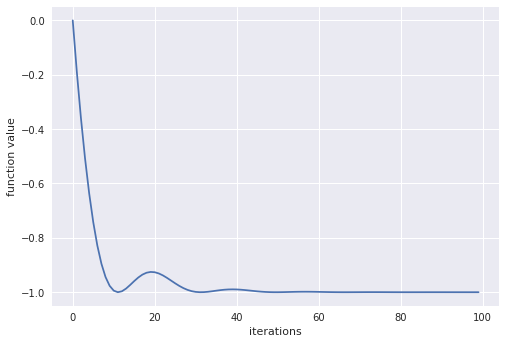

In [10]:
import matplotlib.pyplot as plt
# HANDS ON: insert your solution here
